In [1]:
import sys
sys.path.append("..")

In [2]:
from data_tools.tools import *
from scipy.integrate import odeint

import seaborn as sns
from matplotlib import pyplot as plt
from DE_Library.diferential_equation_functionals import *


In [3]:
def get_relevant_info_text(df_row):
    df = df_row
    relevant_info = {}
    if df["method"] == "PQK":
        relevant_info["CI_num_layers"] = df["CI_num_layers"]
        relevant_info["CI_num_qubits"] = df["CI_num_qubits"]
        relevant_info["CI_encoding_circuit_label"] = df["CI_encoding_circuit_label"]
        relevant_info["gamma"] = df["gamma"]
    elif df["method"] == "FQK":
        relevant_info["CI_num_layers"] = df["CI_num_layers"]
        relevant_info["CI_num_qubits"] = df["CI_num_qubits"]
        relevant_info["CI_encoding_circuit_label"] = df["CI_encoding_circuit_label"]
    elif df["method"] == "classical_RBF":
        relevant_info["gamma"] = df["gamma"]

    return relevant_info


def get_relevant_info_text(df_row):
    df = df_row
    text = ""
    if df["method"] == "PQK":
        text += f"L: {df['CI_num_layers']}, "
        text += "$n_{qubits}$" +f": {df['CI_num_qubits']}, "
        text += f"$\gamma$:  {np.round(df['gamma'], 3)}, "
        text += f"fmap: {df['CI_encoding_circuit_label'][:-7]}"
    elif df["method"] == "FQK":
        text += f"L: {df['CI_num_layers']}, "
        text += "$n_{qubits}$" +f": {df['CI_num_qubits']}, "
        text += f"fmap: {df['CI_encoding_circuit_label'][:-7]}"
    elif df["method"] == "classical_RBF":
        text += f"$\gamma$: {np.round(df['gamma'], 3)}"
    return text

        

In [5]:
path_to_results = "../data/results/DE_11_13"
results_QNN = load_feather_folder_as_pd(path_to_results)

['../data/results/DE_11_13\\0_T.feather', '../data/results/DE_11_13\\1_T.feather']
0.014277458190917969


c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)
c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)


In [6]:
results_QNN

,f_sol,optimal_alpha,mse,method,loss_name,domain,executor_type,CI_num_qubits,CI_num_layers,loss_history
0,"[1.0, -0.09038609903337996, -0.066781902708214...","[-1.2746001823960058, 2.5591043743597375, -6.1...",0.009701,QNN_floating,paper_decay_QNN,"[0.0, 0.04736842105263158, 0.09473684210526316...",pennylane,7,5,"[4225.73664, 2094.83459, 298.82721, 1082.19026..."
1,"[1.0, -0.09038609903337996, -0.066781902708214...","[-1.2746001823960058, 2.5591043743597375, -6.1...",0.009701,QNN_floating,paper_decay_QNN,"[0.0, 0.04736842105263158, 0.09473684210526316...",pennylane,7,5,"[4231.95758, 2101.68616, 300.60146, 1086.90776..."


In [7]:
path_to_results = "../data/results/DE_0_10"
results_QNN = load_feather_folder_as_pd(path_to_results)
results_QNN
#order result by smallest mse 
x_line = np.linspace(0.01, 0.9, 20)
#x_line =  np.linspace(0.001, 0.9, 20)


['../data/results/DE_0_10\\0_T.feather']
0.006707668304443359


c:\Users\jsl-rf\Desktop\KernelsDE\plotting_notebooks\..\data_tools\tools.py:40: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dict_loss = pd.read_csv(temp_file[:-8]+".log", delim_whitespace=True)


In [10]:
results_QNN["optimal_alpha"][0]

array([-1.07715038,  2.7219963 , -6.59279406, -2.93091288, -4.67944728,
       -5.59717259, -4.19169374, -1.95882813, -1.57086318, -0.06443981,
       -1.35943456,  1.75404608, -3.70062638,  5.7572003 , -6.51080186,
        2.50059708, -0.87146297,  0.60601579, -4.83007704, -3.88106872,
        3.73881442,  5.65916248, -1.9331907 ,  2.54195058,  4.65806164,
        5.44855541, -4.68248781, -5.42320104, -3.85855754,  4.79190903,
       -4.71519585, -0.2693833 ,  6.13921328, -0.0901489 ,  2.1530119 ,
       -1.85930229,  2.30318649,  4.28159076, -6.06144632,  3.16142965,
        5.70634325,  2.80909182, -2.44034497,  3.7049682 , -5.11620004,
       -0.73605499,  5.12189742, -3.1286155 , -2.29095941, -4.44463243,
       -6.50740865,  2.10059553, -4.34651408, -2.7844201 , -0.11397309,
       -4.99038396,  0.59263634, -5.13094445,  1.38624068,  2.64682028,
       -5.84565056, -1.29461527,  3.26056765, -1.56750968, -5.12771776,
        0.68843446,  2.30584474,  0.27867373,  5.81676409,  0.50

In [47]:
 [-1.24008307  2.6037004  -6.15707398 -2.35078514 -4.28255978 -5.13036266
 -3.78811841 -2.13851025 -1.30896435  0.50701894 -1.34401696  2.08664507
 -3.82336268  4.7494504  -6.19496096  1.77647595 -0.84599713  0.44652184
 -3.93896493 -3.9717711   3.57598461  6.00902255 -2.21039551  2.21377
  5.01019367  4.66813956 -5.51426205 -5.70117888 -4.25627766  4.83903247
 -5.08529753 -1.11914167  6.1385628   0.62435681  2.78191748 -2.45485626
  2.44416453  3.9205253  -5.84733583  3.28238535  5.95423368  3.31035015
 -2.96204943  3.69705842 -4.81185961 -0.50346241  5.02722425 -2.13288672
 -2.2893685  -4.60847376 -6.06693185  2.02656434 -3.33918359 -2.93104727
  0.01381312 -5.85768221  1.00685156 -4.42214237  1.30286098  2.49876523
 -5.06778764 -1.00119686  2.29074521 -0.90430567 -5.29609889  0.65627537
  2.34714908  0.05816855  5.79436412  1.1176937   4.98164585 -4.1965645
 -4.785501    3.83672858 -0.89572258 -3.89509417  5.33691107 -1.63940187
  3.12179166  2.79848045  4.85872746  1.31891869  2.99276393 -1.667983
 -2.68598355  4.8551823  -0.90362894  5.96151229  2.19366944  1.52927583
 -4.92962195  6.04241796 -0.62942384  0.93609816 -1.11636644 -3.30461897
  5.4338281   0.94029982 -6.24711122  1.52738582 -2.55239183  0.34001675
  4.70373568 -1.56828961  5.13381664]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (52592395.py, line 1)

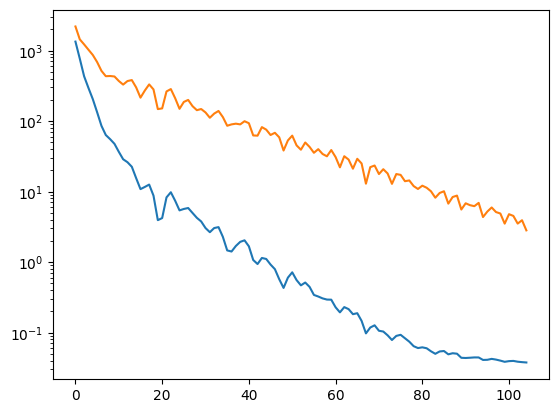

In [48]:
plt.plot(results_PQK.iloc[0]["loss_history"], label="Loss")
plt.plot(results_PQK.iloc[0]["gradient_history"], label="Loss")

plt.yscale("log")

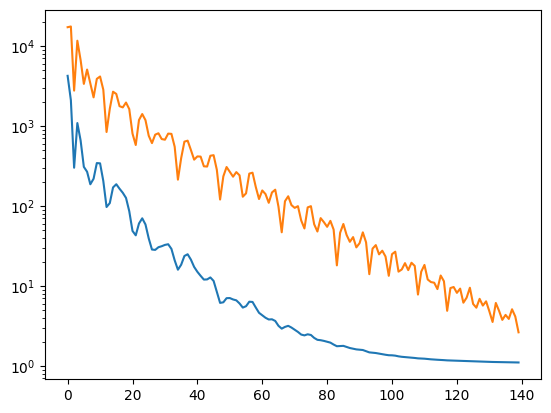

In [40]:
plt.plot(results_PQK.iloc[1]["loss_history"], label="Loss")
plt.plot(results_PQK.iloc[1]["gradient_history"], label="Loss")

plt.yscale("log")

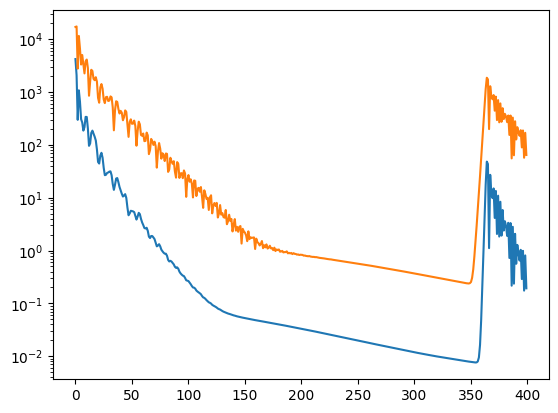

In [32]:
plt.plot(results_PQK.iloc[0]["loss_history"], label="Loss")
plt.plot(results_PQK.iloc[0]["gradient_history"], label="Loss")

plt.yscale("log")

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

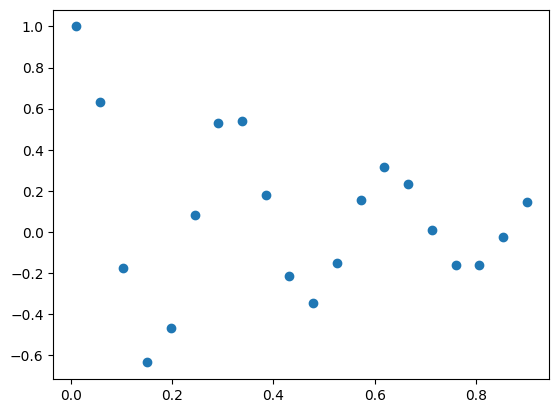

In [52]:
plt.scatter(x_line, results_PQK.iloc[0]["f_sol"])
#plt.plot(x_line, results_PQK.iloc[1]["f_sol"])

plt.plot

In [54]:
f_initial = 1
true_sol = odeint(mapping_of_derivatives_of_loss_functions["paper"], f_initial, x_line[:])
#true_sol = odeint(mapping_of_derivatives_of_loss_functions["log_ode"], f_initial, x_line[:])

In [55]:
#calculate mse of the solution
#true_sol = np.log(x_line)
#true_sol = np.cos(x_line)
method_sol = results_PQK.iloc[0]["f_sol"]

mse = np.mean((method_sol - true_sol[:,0]))**2
print(f"MSE of the solution: {mse}")

MSE of the solution: 0.0015571156338066098


In [56]:
results_PQK.iloc[0]["f_sol"]

array([ 1.        ,  0.63392736, -0.17414256, -0.63630977, -0.46934871,
        0.08339678,  0.53225742,  0.54162821,  0.17889664, -0.21681627,
       -0.34500114, -0.1528589 ,  0.152656  ,  0.31530533,  0.23414442,
        0.00895032, -0.16272235, -0.16156291, -0.02446089,  0.14371611])

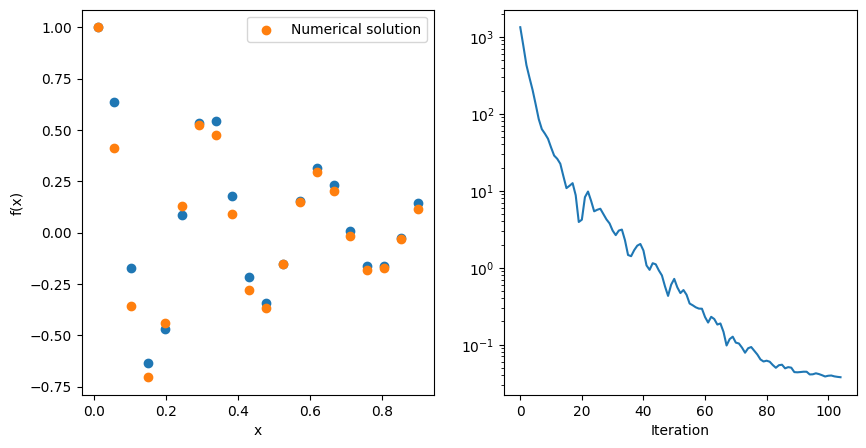

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(x_line, results_PQK.iloc[0]["f_sol"])
#axs[0].plot(x_line, results_PQK.iloc[1]["f_sol"])


    

axs[0].scatter(x_line, true_sol, label="Numerical solution")
axs[0].set_xlabel("x")
axs[0].set_ylabel("f(x)")
axs[0].legend()

axs[1].plot(results_PQK.iloc[0]["loss_history"], label="Loss")
#axs[1].plot(results_PQK.iloc[0]["gradient_history"], label="Avg Gradient")

#axs[1].plot(results_PQK.iloc[1]["loss_history"], label="Loss")
#axs[1].plot(results_PQK.iloc[1]["gradient_history"], label="Avg Gradient")

#axs[1].plot(results_PQK.iloc[2]["gradient_history"], label="Avg Gradient")

axs[1].set_xlabel("Iteration")
axs[1].set_yscale("log")


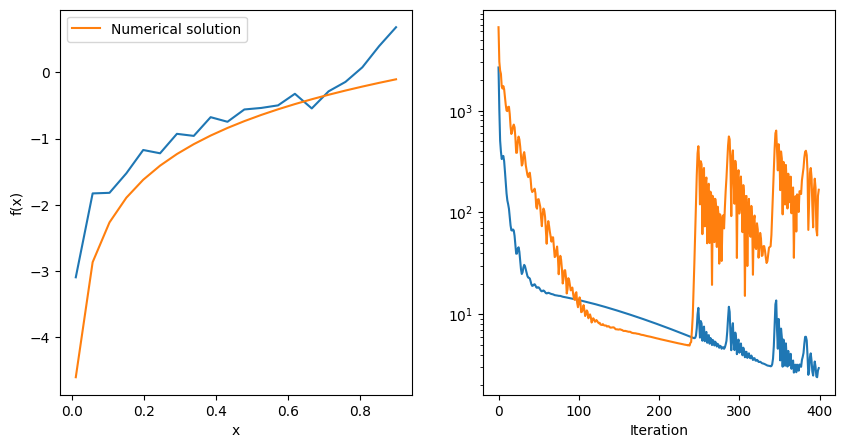

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(x_line, results_PQK.iloc[0]["f_sol"])
    

axs[0].plot(x_line, true_sol, label="Numerical solution")
axs[0].set_xlabel("x")
axs[0].set_ylabel("f(x)")
axs[0].legend()

axs[1].plot(results_PQK.iloc[0]["loss_history"], label="Loss")
axs[1].plot(results_PQK.iloc[0]["gradient_history"], label="Avg Gradient")
axs[1].set_xlabel("Iteration")
axs[1].set_yscale("log")


f_sol               [-3.0959358815211484, -1.8290018287172733, -1....
optimal_alpha       [-1.0254578156747016, 3.335783914293104, -6.41...
mse                                                          0.121576
method                                                     QNN_pinned
loss_name                                                     log_ode
domain              [0.01, 0.056842105263157895, 0.103684210526315...
CI_num_qubits                                                       6
CI_num_layers                                                       5
loss_history        [2656.32597, 1027.53182, 507.15367, 396.40272,...
gradient_history    [6604.21898, 3026.25226, 2477.71054, 2297.8001...
Name: 2, dtype: object
2656.32597
f_sol               [-1.8285881960927424, -1.557998988956376, -1.3...
optimal_alpha       [-1.1214434791532728, 2.4460107081261455, -6.0...
mse                                                          0.261159
method                                                  

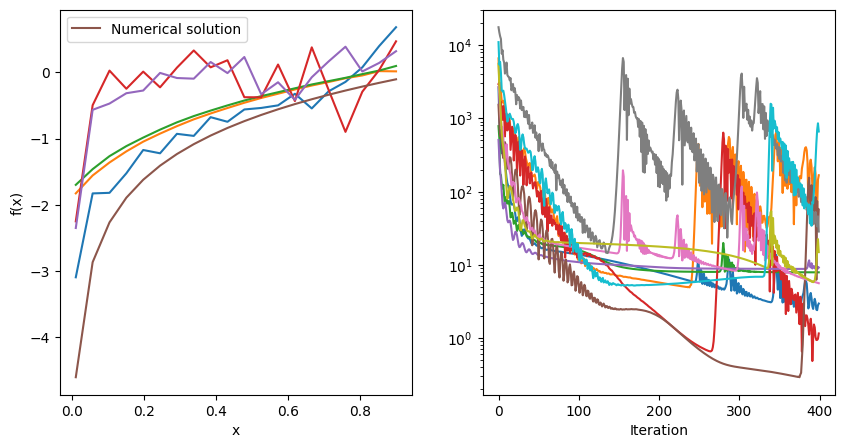

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, df_row in results_PQK.iterrows():
    relevant_info = get_relevant_info_text(df_row)
    axs[0].plot(x_line, df_row["f_sol"], label=get_relevant_info_text(df_row))
    print(df_row["loss_history"][0])
    axs[1].plot(df_row["loss_history"], label=get_relevant_info_text(df_row))
    axs[1].plot(df_row["gradient_history"], label=get_relevant_info_text(df_row))

axs[0].plot(x_line, true_sol, label="Numerical solution")
axs[0].set_xlabel("x")
axs[0].set_ylabel("f(x)")
axs[0].legend()

#axs[1].plot(results_PQK["loss_history"][0], label="Loss")
#axs[1].plot(results_PQK["gradient_history"][0], label="Avg Gradient")
axs[1].set_xlabel("Iteration")
axs[1].set_yscale("log")


In [7]:

def f_derivatives_2ODE(f, x_span):
    """
    f'(x) = f'(x)
    f''(x) = f(x)
    """
    return [f[1], -f[0]]

x_span = np.linspace(0.0001, 1.5*3.14, 50)
f_initial_vec = np.array([0, 1])

f_odeint = odeint(f_derivatives_2ODE, f_initial_vec, x_span)

In [11]:
y_paper = solution_of_g_paper(x_span)

In [12]:
 0.99824404,  0.89332777,  0.78987319,  0.68902807,  0.59399918,                                                                                                                                          0.50603635,  0.42425495,  0.34859147,  0.28065315,  0.22142078,                                                                                                                                                    0.16945649,  0.12294497,  0.0826249 ,  0.0498368 ,  0.02262102,                                                                                                                                                   -0.00179538, -0.02187631, -0.03554273, -0.04695019, -0.0578524

(0.99824404,
 0.89332777,
 0.78987319,
 0.68902807,
 0.59399918,
 0.50603635,
 0.42425495,
 0.34859147,
 0.28065315,
 0.22142078,
 0.16945649,
 0.12294497,
 0.0826249,
 0.0498368,
 0.02262102,
 -0.00179538,
 -0.02187631,
 -0.03554273,
 -0.04695019,
 -0.0578524)

In [23]:
y_paper_manual = np.array([0.99824404,
 0.89332777,
 0.78987319,
 0.68902807,
 0.59399918,
 0.50603635,
 0.42425495,
 0.34859147,
 0.28065315,
 0.22142078,
 0.16945649,
 0.12294497,
 0.0826249,
 0.0498368,
 0.02262102,
 -0.00179538,
 -0.02187631,
 -0.03554273,
 -0.04695019,
 -0.0578524])

y_paper_manual = np.array([0.70983051,  0.52628459,  0.34557225,  0.17575512,  0.02454956,
       -0.10112202, -0.19556577, -0.25472301, -0.27653297, -0.26123284,
       -0.21157179, -0.13290883, -0.03315382,  0.07750698,  0.18718995,
        0.28334501,  0.35450378,  0.39328378,  0.40192383,  0.40412717])

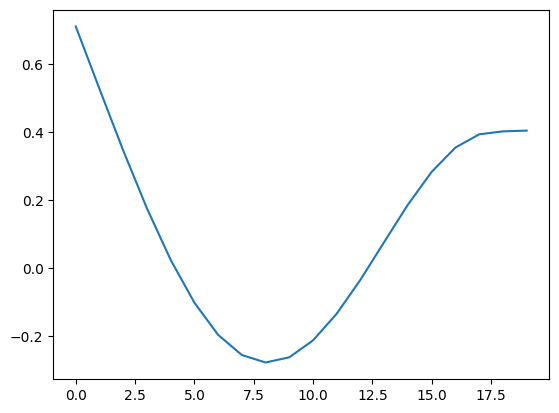

In [24]:
plt.plot(y_paper_manual)
#plt.plot(y_paper)

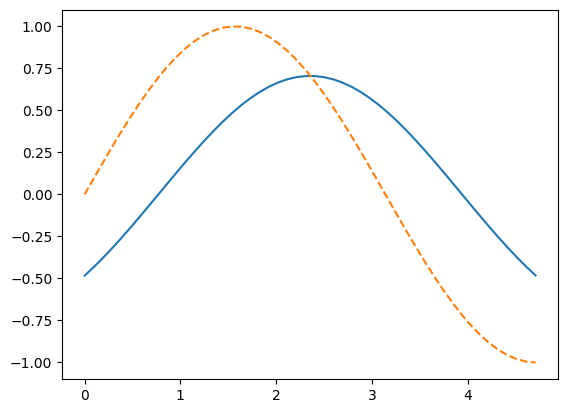

In [10]:
plt.plot(x_span, results_PQK.iloc[0]["f_sol"][0])
plt.plot(x_span, np.sin(x_span), "--")
#plt.plot(x_span, f_odeint[:, 0])




In [9]:
results_PQK["gamma"] = np.sqrt(0.5*1/results_PQK["sigma"])
results_PQK["analytical_solution"] = results_PQK["g_name"].apply(lambda x: analytical_solutions[x])
results_PQK["mse_with_analytical"] = results_PQK.apply(lambda x: np.mean((x["f_sol"] - x["analytical_solution"])**2), axis=1)
results_PQK = results_PQK.sort_values(by="mse_with_analytical")



KeyError: 'sigma'

In [ ]:
path_to_results = "../data/results/DE_2_5"
results_RBF = load_feather_folder_as_pd(path_to_results)
results_RBF["gamma"] = np.sqrt(0.5*1/results_RBF["sigma"])
results_RBF = results_RBF.sort_values(by="mse")
results_RBF["analytical_solution"] = results_RBF["g_name"].apply(lambda x: analytical_solutions[x])
results_RBF["mse_with_analytical"] = results_RBF.apply(lambda x: np.mean((x["f_sol"] - x["analytical_solution"])**2), axis=1)

0.005984783172607422


In [ ]:
path_to_results = "../data/results/DE_2_4"
results_FQK = load_feather_folder_as_pd(path_to_results)
results_FQK = results_FQK.sort_values(by="mse")
results_FQK["analytical_solution"] = results_FQK["g_name"].apply(lambda x: analytical_solutions[x])
results_FQK["mse_with_analytical"] = results_FQK.apply(lambda x: np.mean((x["f_sol"] - x["analytical_solution"])**2), axis=1)


0.009935379028320312


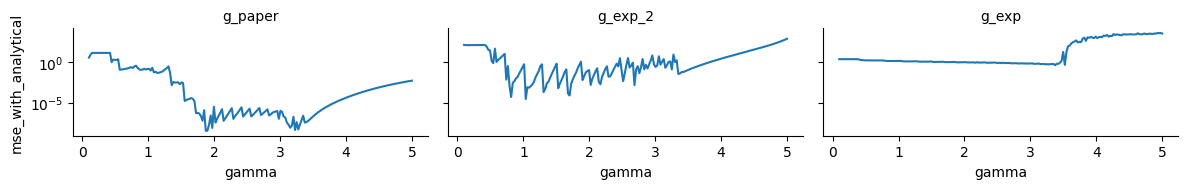

In [ ]:
import seaborn as sns

g = sns.relplot(x="gamma", y="mse_with_analytical", 
                data=results_RBF.drop_duplicates(subset=["gamma", "g_name"]),
                kind="line", 
                col="g_name", 
                height=2,  # Adjust the height as needed
                aspect=2  
                )
g.set_titles("{col_name}")
g.set(yscale="log") 

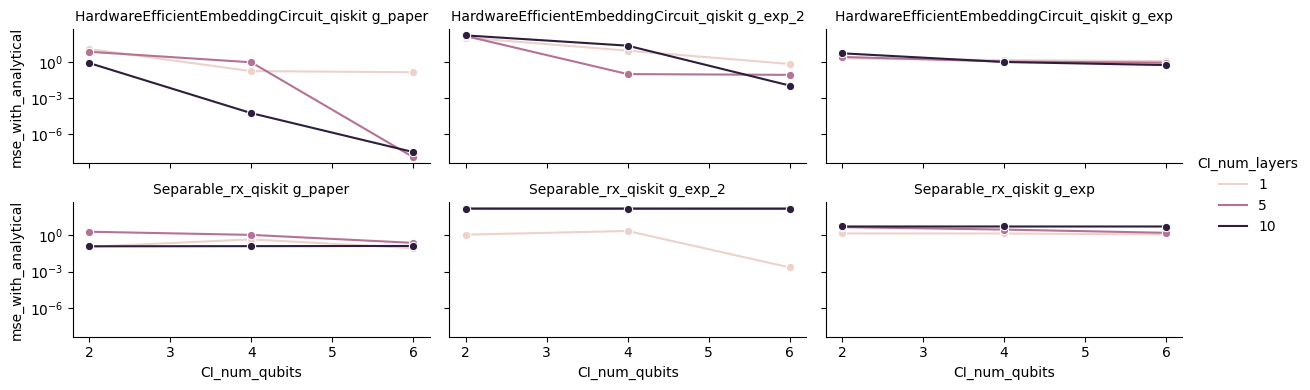

In [ ]:
import seaborn as sns

g = sns.relplot(x="CI_num_qubits", y="mse_with_analytical", 
                data=results_FQK.drop_duplicates(subset=["CI_num_qubits", "CI_num_layers", "CI_encoding_circuit_label", "g_name"]),
                kind="line", 
                col="g_name", 
                row="CI_encoding_circuit_label", 
                hue="CI_num_layers",
                height=2,  # Adjust the height as needed
                aspect=2,  
                marker="o"
                )
g.set_titles("{row_name} {col_name}")
g.set(yscale="log") 

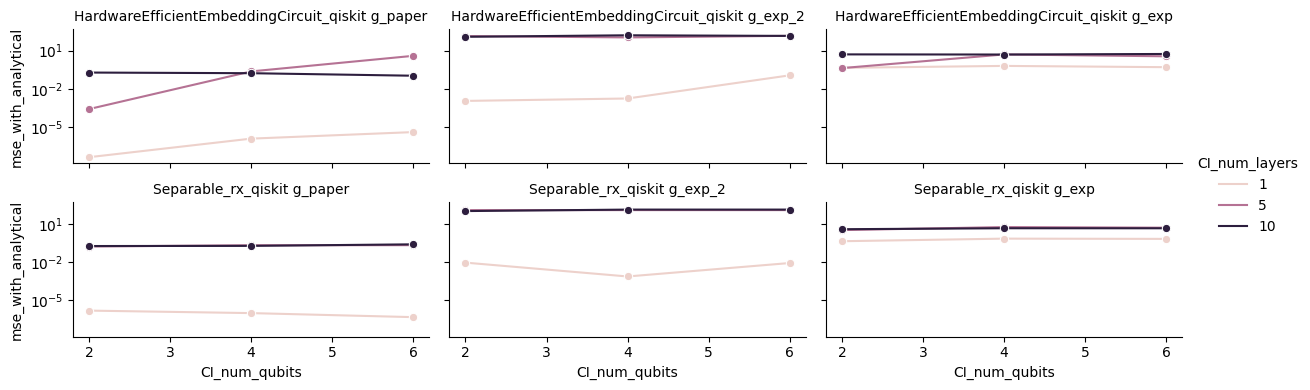

In [ ]:
import seaborn as sns

g = sns.relplot(x="CI_num_qubits", y="mse_with_analytical", 
                data=results_PQK.drop_duplicates(subset=["CI_num_qubits", "CI_num_layers", "CI_encoding_circuit_label", "g_name"]),
                kind="line", 
                col="g_name", 
                row="CI_encoding_circuit_label", 
                hue="CI_num_layers",
                height=2,  # Adjust the height as needed
                aspect=2,  
                marker="o"
                )
g.set_titles("{row_name} {col_name}")
g.set(yscale="log") 

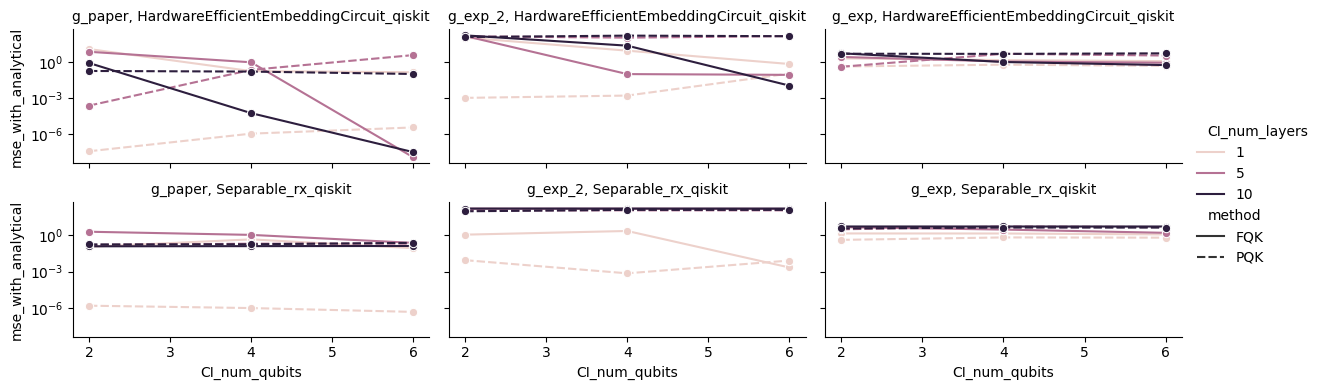

In [ ]:
import seaborn as sns

results_FQK_plot = results_FQK.drop_duplicates(subset=["CI_num_qubits", "CI_num_layers", "CI_encoding_circuit_label", "g_name"])
results_PQK_plot = results_PQK.drop_duplicates(subset=["CI_num_qubits", "CI_num_layers", "CI_encoding_circuit_label", "g_name"])

#merge the results
results_QK_plot = pd.concat([results_FQK_plot, results_PQK_plot])

g = sns.relplot(x="CI_num_qubits", y="mse_with_analytical", 
                data=results_QK_plot,
                kind="line", 
                col="g_name", 
                row="CI_encoding_circuit_label", 
                hue="CI_num_layers",
                height=2,  # Adjust the height as needed
                aspect=2,  
                marker="o",
                style="method"
                )
g.set_titles("{col_name}, {row_name}")
g.set(yscale="log") 

In [ ]:
results_FQK.head()

,f_sol,optimal_alpha,mse,CI_encoding_circuit_label,CI_num_qubits,CI_num_layers,sigma,method,g_name,f_initial,analytical_solution,mse_with_analytical
7,"[1.000077584832995, 0.8268039776895315, 0.4664...","[-2.3682734401314662, -30.847692307992368, 50....",4.646898e-10,HardwareEfficientEmbeddingCircuit_qiskit,6,5,0,FQK,g_paper,1.0,"[0.9997980203992932, 0.8267342169011374, 0.466...",1.268182e-08
8,"[1.0000170462082871, 0.8271406096271257, 0.466...","[-1.2457889029334712, 2.95542879125854, 4.2799...",5.172854e-09,HardwareEfficientEmbeddingCircuit_qiskit,6,10,0,FQK,g_paper,1.0,"[0.9997980203992932, 0.8267342169011374, 0.466...",3.361295e-08
5,"[1.0148102801599297, 0.840660210421726, 0.4800...","[-9.544363055979394, -43.43622492976331, 38.49...",4.230039e-05,HardwareEfficientEmbeddingCircuit_qiskit,4,10,0,FQK,g_paper,1.0,"[0.9997980203992932, 0.8267342169011374, 0.466...",5.820548e-05
15,"[0.7928179823528296, 0.4966990212113558, 0.253...","[-193.48170346575822, 5290.133572045253, 1982....",3.640265e-04,Separable_rx_qiskit,6,1,0,FQK,g_paper,1.0,"[0.9997980203992932, 0.8267342169011374, 0.466...",8.785769e-02
51,"[2.9873424946360814, 3.246169499617494, 3.5146...","[78.46417431592293, -2485.380774880659, -827.5...",1.391312e-03,Separable_rx_qiskit,6,1,0,FQK,g_exp_2,3.0,"[3.0010000600033337, 3.2614171494104096, 3.530...",2.182970e-03


<Axes: >

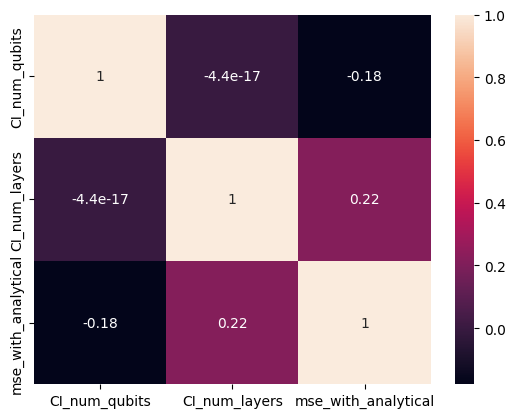

In [ ]:
sns.heatmap(results_FQK[['CI_num_qubits', 'CI_num_layers', 'mse_with_analytical']].corr(method="pearson"), annot=True)

<Axes: >

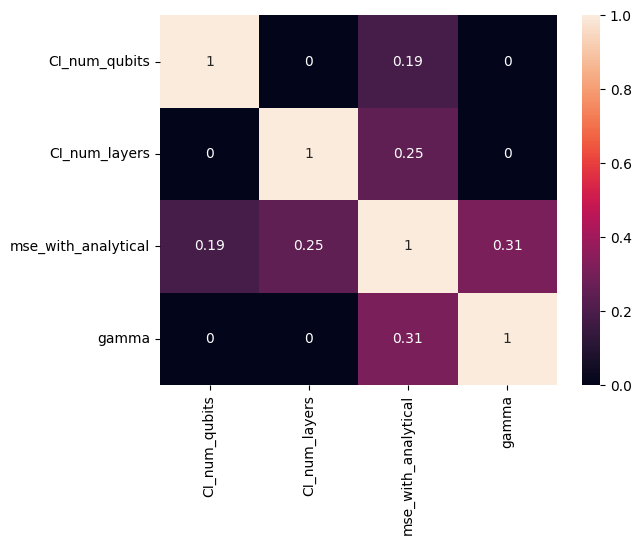

In [ ]:
corr = results_PQK[['CI_num_qubits', 'CI_num_layers', 'mse_with_analytical', 'gamma']].corr(method="spearman") 
sns.heatmap(corr, annot=True)

Text(1.1, 0.1, '$\\gamma$: 1.922')

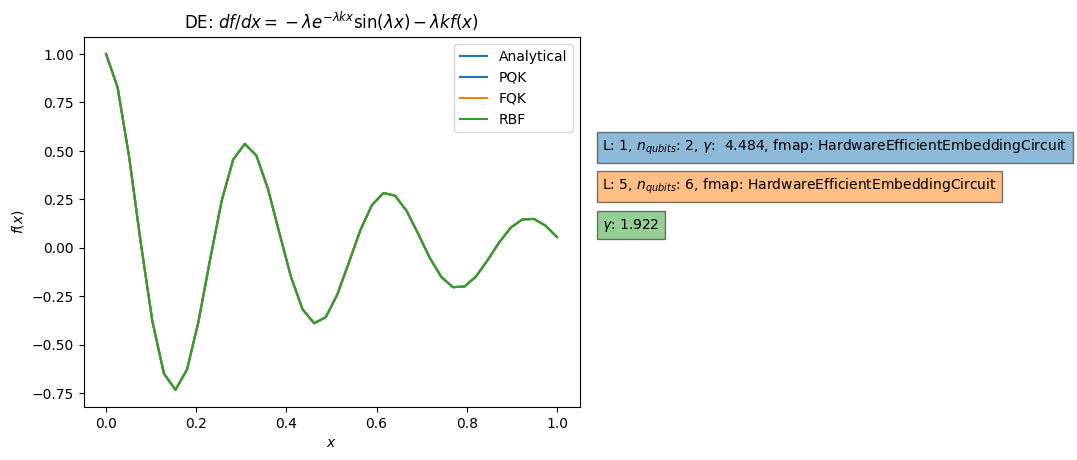

In [ ]:
#result with lowest mse
g_name_to_plot = "g_paper"

x_span = np.linspace(0.0001, 1, 40)
plt.plot(x_span, analytical_solutions[g_name_to_plot], label="Analytical")
plt.plot(x_span, results_PQK[results_PQK["g_name"] == g_name_to_plot].iloc[0]["f_sol"], label="PQK", c=f"C{0}")
plt.plot(x_span, results_FQK[results_FQK["g_name"] == g_name_to_plot].iloc[0]["f_sol"], label="FQK", c=f"C{1}")
plt.plot(x_span, results_RBF[results_RBF["g_name"] == g_name_to_plot].iloc[0]["f_sol"], label="RBF", c=f"C{2}")

plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title(r"DE: $df/dx = -\lambda e^{-\lambda kx } \sin(\lambda x) - \lambda k f(x)$") 
                 


plt.legend()



#plot a box outside the plot with the relevant info
str_PQK_info = str(get_relevant_info_text(results_PQK[results_PQK["g_name"] == "g_paper"].iloc[0]))
plt.text(1.1, 0.5, str_PQK_info, 
         bbox=dict(facecolor=f"C{0}", alpha=0.5))
str_FQK_info = str(get_relevant_info_text(results_FQK[results_FQK["g_name"] == "g_paper"].iloc[0]))
plt.text(1.1, 0.3, str_FQK_info, 
         bbox=dict(facecolor=f"C{1}", alpha=0.5))
str_RBF_info = str(get_relevant_info_text(results_RBF[results_RBF["g_name"] == "g_paper"].iloc[0]))
plt.text(1.1, 0.1, str_RBF_info, 
         bbox=dict(facecolor=f"C{2}", alpha=0.5))



Text(1.1, 11, '$\\gamma$: 0.814')

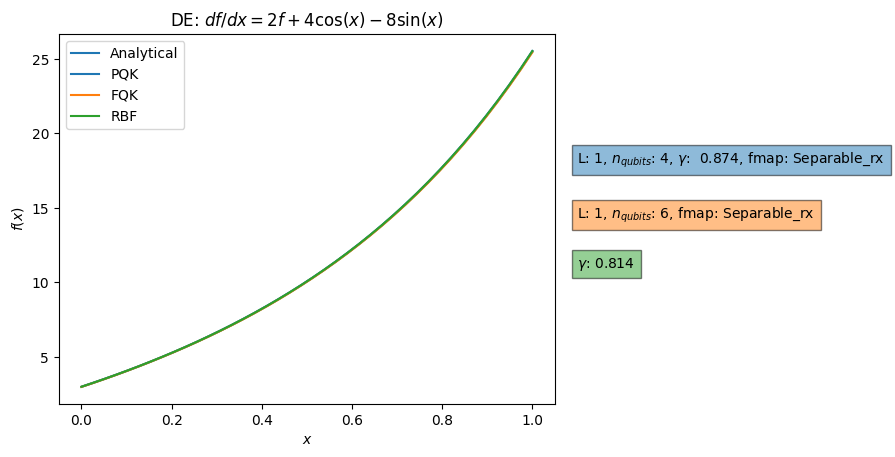

In [ ]:
#result with lowest mse
g_name_to_plot = "g_exp_2"

x_span = np.linspace(0.0001, 1, 40)
plt.plot(x_span, analytical_solutions[g_name_to_plot], label="Analytical")
plt.plot(x_span, results_PQK[results_PQK["g_name"] == g_name_to_plot].iloc[0]["f_sol"], label="PQK", c=f"C{0}")
plt.plot(x_span, results_FQK[results_FQK["g_name"] == g_name_to_plot].iloc[0]["f_sol"], label="FQK", c=f"C{1}")
plt.plot(x_span, results_RBF[results_RBF["g_name"] == g_name_to_plot].iloc[0]["f_sol"], label="RBF", c=f"C{2}")
plt.legend()

#print details of the best result

plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title(r"DE: $df/dx = 2f + 4\cos(x) - 8\sin(x)$")


#plot a box outside the plot with the relevant info
str_PQK_info = str(get_relevant_info_text(results_PQK[results_PQK["g_name"] == "g_exp_2"].iloc[0]))
plt.text(1.1, 18, str_PQK_info, 
         bbox=dict(facecolor=f"C{0}", alpha=0.5))
str_FQK_info = str(get_relevant_info_text(results_FQK[results_FQK["g_name"] == "g_exp_2"].iloc[0]))
plt.text(1.1, 14.3, str_FQK_info, 
         bbox=dict(facecolor=f"C{1}", alpha=0.5))
str_RBF_info = str(get_relevant_info_text(results_RBF[results_RBF["g_name"] == "g_exp_2"].iloc[0]))
plt.text(1.1, 11, str_RBF_info, 
         bbox=dict(facecolor=f"C{2}", alpha=0.5))



Text(1.1, -6, '$\\gamma$: 3.252')

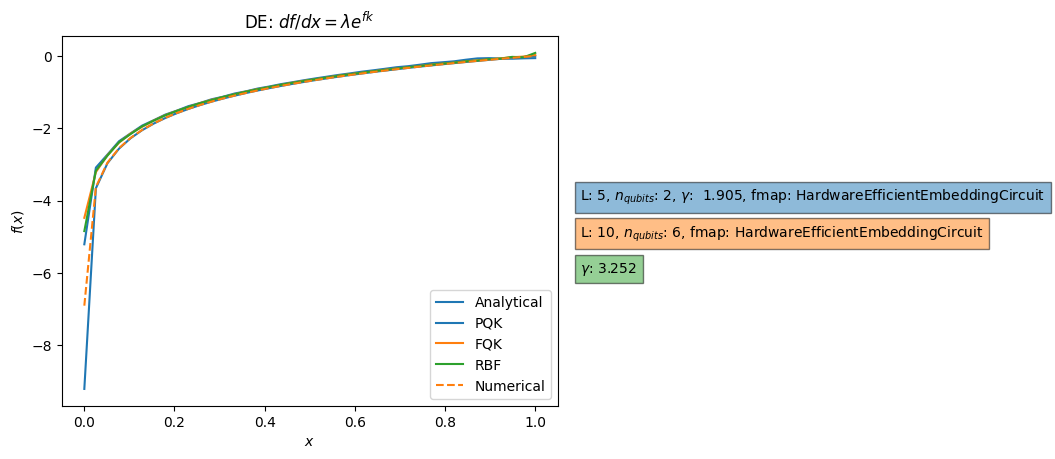

In [ ]:
#result with lowest mse
g_name_to_plot = "g_exp"

x_span = np.linspace(0.0001, 1, 40)
plt.plot(x_span, analytical_solutions[g_name_to_plot], label="Analytical")
plt.plot(x_span, results_PQK[results_PQK["g_name"] == g_name_to_plot].iloc[0]["f_sol"], label="PQK", c=f"C{0}")
plt.plot(x_span, results_FQK[results_FQK["g_name"] == g_name_to_plot].iloc[0]["f_sol"], label="FQK", c=f"C{1}")
plt.plot(x_span, results_RBF[results_RBF["g_name"] == g_name_to_plot].iloc[0]["f_sol"], label="RBF", c=f"C{2}")
plt.plot(x_span, numerical_solutions[g_name_to_plot], label="Numerical", linestyle="--")

plt.legend()


plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title(r"DE: $df/dx = \lambda e^{f k}$")


#plot a box outside the plot with the relevant info
str_PQK_info = str(get_relevant_info_text(results_PQK[results_PQK["g_name"] == "g_exp"].iloc[0]))
plt.text(1.1, -4, str_PQK_info, 
         bbox=dict(facecolor=f"C{0}", alpha=0.5))
str_FQK_info = str(get_relevant_info_text(results_FQK[results_FQK["g_name"] == "g_exp"].iloc[0]))
plt.text(1.1, -5, str_FQK_info, 
         bbox=dict(facecolor=f"C{1}", alpha=0.5))
str_RBF_info = str(get_relevant_info_text(results_RBF[results_RBF["g_name"] == "g_exp"].iloc[0]))
plt.text(1.1, -6, str_RBF_info, 
         bbox=dict(facecolor=f"C{2}", alpha=0.5))


In [ ]:
from circuits.circuits import * 
from utils.rbf_kernel_tools import *

from solvers.MMR.PQK_solver import PQK_solver
from solvers.MMR.FQK_solver import FQK_solver
from solvers.MMR.kernel_solver import Solver


def get_K_from_row(row, method, executor_type):
    """Get the K matrix from a row in the results dataframe
    """
    x_span = np.linspace(0.0001, 1, 40)

    print(row["CI_encoding_circuit_label"])
    circuit_information = {"num_qubits": row["CI_num_qubits"],
                            "num_layers": row["CI_num_layers"],
                            "encoding_circuit": circuits_dictionary_qiskit[row["CI_encoding_circuit_label"]]
                            }
    print(circuit_information)
    if method == "PQK":
        O_Solver = PQK_solver(circuit_information, executor_type, envelope={"function": rbf_kernel_manual, 
                                            "derivative_function": analytical_derivative_rbf_kernel, 
                                            "sigma": row["sigma"]})
    elif method == "FQK":
        O_Solver = FQK_solver(circuit_information, executor_type)
    elif method == "classical_RBF":
        O_Solver = Solver(circuit_information)

    
    
    return O_Solver.get_Kernel(x_span)

In [ ]:
best_K_PQK = get_K_from_row(results_PQK[results_PQK["g_name"] == g_name_to_plot].iloc[0], "PQK", Executor("statevector_simulator"))
worst_K_PQK = get_K_from_row(results_PQK[results_PQK["g_name"] == g_name_to_plot].iloc[-1], "PQK", Executor("statevector_simulator"))

HardwareEfficientEmbeddingCircuit_qiskit
{'num_qubits': 2, 'num_layers': 5, 'encoding_circuit': <function HardwareEfficientEmbeddingCircuit_qiskit at 0x000002B0D920BAC0>}
HardwareEfficientEmbeddingCircuit_qiskit
{'num_qubits': 4, 'num_layers': 5, 'encoding_circuit': <function HardwareEfficientEmbeddingCircuit_qiskit at 0x000002B0D920BAC0>}


In [ ]:
def eigendecomposition(K):
    """Returns ordered eigenvalues and normalized eigenvectors of a kernel matrix."""
    eigenvalue_spectrum, eigenvectors = np.linalg.eigh(1/K.shape[0] * K)
    inds_sort = np.argsort(eigenvalue_spectrum)
    inds_sort = inds_sort[::-1]
    eigenvalue_spectrum = eigenvalue_spectrum[inds_sort]
    eigenvectors = eigenvectors[:,inds_sort]
    return eigenvalue_spectrum, eigenvectors

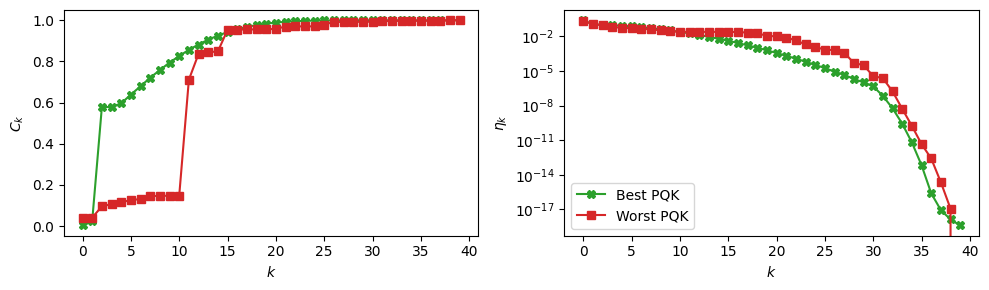

In [ ]:
kernel_tensor = [best_K_PQK, worst_K_PQK]
solution_list = [results_PQK.iloc[0]["f_sol"], results_PQK.iloc[-1]["f_sol"]]

marker = ["X-", "s-", "o-"]

labels = ["Best PQK", "Worst PQK"]

#two column plot axes
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
for idx_kernel, kernels in enumerate(kernel_tensor):
    K_f = kernels
    eigenvalue_spectrum, eigenvectors = eigendecomposition(K_f)    

    y_train_for_analytical = analytical_solutions[g_name_to_plot]
    if len(y_train_for_analytical.shape) == 1:
        y_train_for_analytical = y_train_for_analytical.reshape(-1, 1)

    #y_train is a column vector
    power = np.sum((eigenvectors.T @ y_train_for_analytical)**2, axis = 1)
    cumul = np.cumsum(power) / np.sum(power)


    axs[0].plot(cumul,marker[idx_kernel], label = f"{labels[idx_kernel]}", color = f"C{idx_kernel+2}")
    axs[0].set_ylabel("$C_k$")
    axs[0].set_xlabel("$k$")
    

    axs[1].plot(eigenvalue_spectrum, marker[idx_kernel], label = f"{labels[idx_kernel]}", color = f"C{idx_kernel+2}")
    axs[1].set_ylabel("$\eta_k$")
    axs[1].set_xlabel("$k$")
    axs[1].set_yscale("log")    


    #mean squared error as a function of x

    mse = (solution_list[idx_kernel] - analytical_solutions[g_name_to_plot])**2/ len(x_span)

    #axs[2].plot(x_span, mse, marker[idx_kernel], label = f"{labels[idx_kernel]}", color = f"C{idx_kernel+2}")
    #axs[2].set_ylabel("MSE")
    #axs[2].set_yscale("log")
    #axs[2].set_xlabel("x")


plt.tight_layout()
plt.legend()
